In [5]:
from google.colab import files
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance (1).csv


In [36]:
df = pd.read_csv("Student_Performance.csv")
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

df.head(10)



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


In [15]:
print(df.isnull().sum())
#print(df.describe())

# No nulls

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


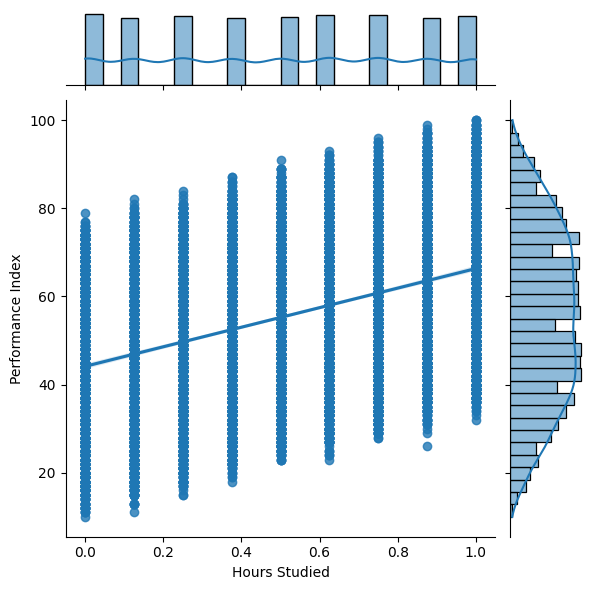

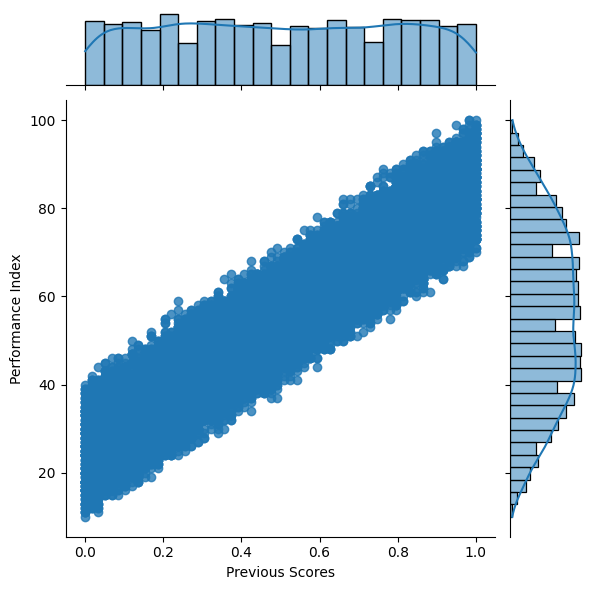

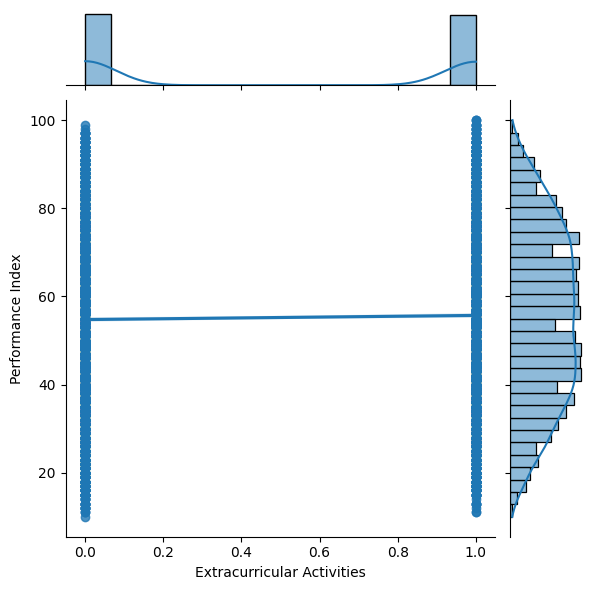

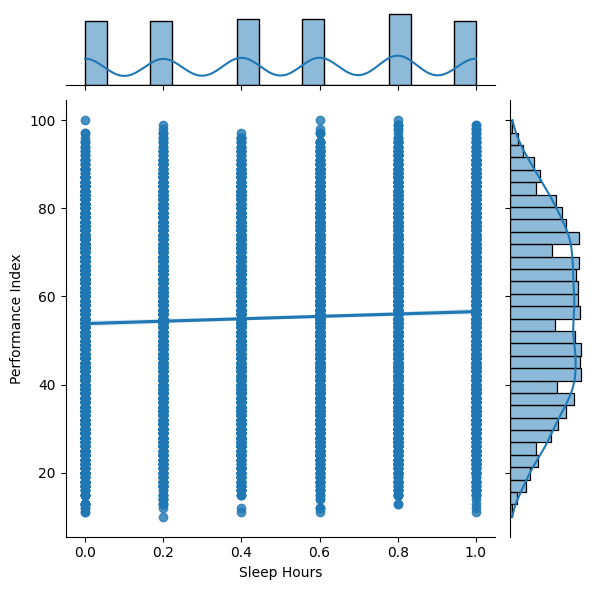

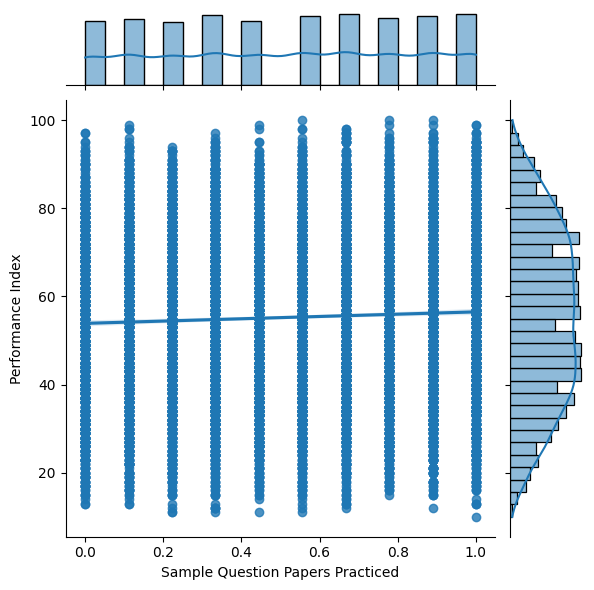

In [37]:
features = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
target = "Performance Index"
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

for feature in features:
    sns.jointplot(x=df[feature], y=df[target], kind="reg", height=6)
    plt.show()




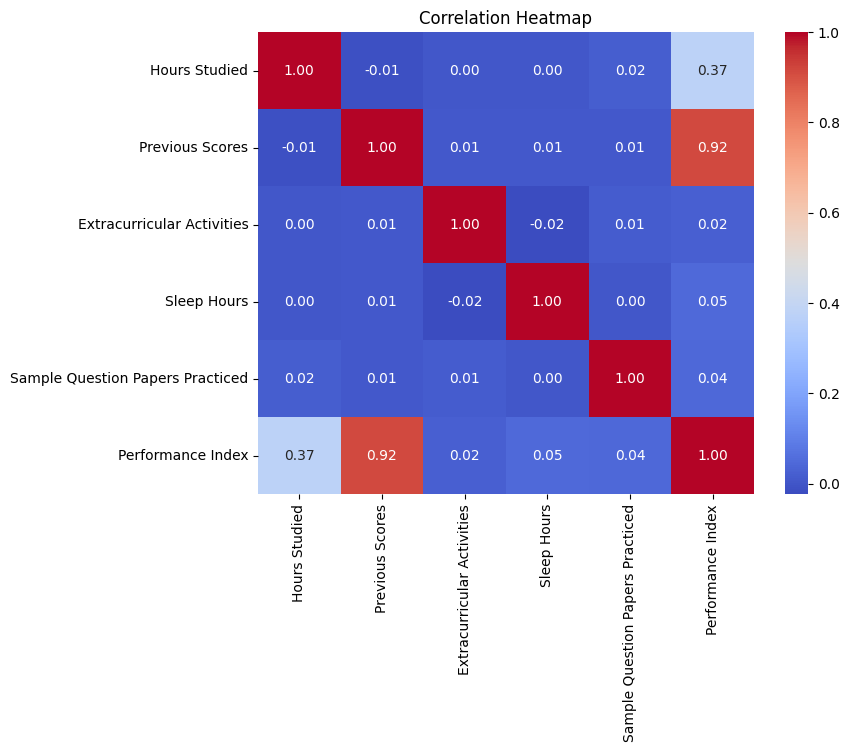

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5),
    "Lasso Regression": LassoCV(alphas=np.logspace(-3, 3, 50), cv=5),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        "MSE": mse,
        "Coefficients": model.coef_ if hasattr(model, "coef_") else "N/A",
    }

    print(f"{name} - MSE: {mse:.4f}")

print(f"Optimal Ridge alpha: {models['Ridge Regression'].alpha_}")
print(f"Optimal Lasso alpha: {models['Lasso Regression'].alpha_}")

for name, result in results.items():
    print(f"\n{name} Coefficients:\n{result['Coefficients']}")


Linear Regression - MSE: 4.0826
Ridge Regression - MSE: 4.0826
Lasso Regression - MSE: 4.0840
ElasticNet Regression - MSE: 55.2348
Bayesian Ridge Regression - MSE: 4.0827
Optimal Ridge alpha: 0.001
Optimal Lasso alpha: 0.001

Linear Regression Coefficients:
[22.81987144 60.00230374  0.60861668  2.38470742  1.72648297]

Ridge Regression Coefficients:
[22.8198435  60.00221661  0.60861654  2.38470501  1.72648211]

Lasso Regression Coefficients:
[22.81047285 59.99074496  0.6045291   2.37598424  1.71683528]

ElasticNet Regression Coefficients:
[15.00844327 37.58736486  0.37200336  1.39089225  1.04813041]

Bayesian Ridge Regression Coefficients:
[22.8197303  60.00186362  0.60861596  2.38469523  1.72647859]
